In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# connecting multicalibration to differential fairness

- **Q1**: when a model $R$ satisfies $\alpha$-multicalibration, what value of $\epsilon$-DC does it satisfy? (what is the bound on $\epsilon$?
- **Q2**: when a model $R$ satisfies $\epsilon$-DC, what value of $\alpha$-multicalibration does it satisfy (if any)?
    - updated Q3, given that $\epsilon$-DC doesn't imply the model is actually calibrated:
    - **Q2**: when a model $R$ satisfies $\epsilon$-DC and $\beta$-calibration, what value of $\alpha$-multicalibration does it satisfy (if any)?
    

## definitions

$y, x$: the label and features. 

$A$: the patient subgroups. 

$R(x)$: a risk prediction model. 

**Definition: $\epsilon$-Differential Calibration**

\begin{equation}
    e^{-\epsilon} \leq \frac{P(y=1 | R(x) = r, A=i)}{P(y=1 | R(x) = r, A=j)} \leq e^{\epsilon}
\end{equation}
for all $r \in [0,1]$ and $i,j \in A, Pr[i]>\gamma, Pr[j]>\gamma$. 

$\gamma$ here is a constraint on how unlikely a group can be: it is the same $\gamma$ in Hebert-Johnson. 



## Q1

Theorem:

Let R(x) be a model satisfying $\alpha$-multicalibration over a discretized set of risk scores, $\lambda$. 
Then R(x) is $(\log \frac{\lambda+2\alpha}{\lambda-2\alpha})$-multicalibrated. 



## Q2

**Theorem**

Let R(x) be a model satisfying $\epsilon$-DC and $\delta$-calibration. 
Then $R(x)$ is ($1-e^{-\epsilon} + \delta$)-multicalibrated. 


In [3]:

def epsilon(lam,a): return np.log( (lam+2*a)/(lam-2*a) )

lam = np.linspace(0.05,1.0,96)
a = np.linspace(0.001,0.003,31)
L,A = np.meshgrid(lam,a)
EPS = epsilon(L,A)
mask = ~np.isfinite(EPS)
Lb,Ab,EPSb = L[mask].flatten(), A[mask].flatten(), EPS[mask].flatten()

print('bad values:',[(vb,ab,zb) for vb,ab,zb in zip(Lb,Ab,EPSb)])




bad values: []


In [4]:
import pandas as pd
import seaborn as sns
frames = []
for i in lam:
    for j in a:
        frames.append({'lambda':i,
                       'alpha':j,
                       'epsilon':epsilon(i,j)
                      })
df = pd.DataFrame.from_records(frames)
df

,lambda,alpha,epsilon
0,0.05,0.001000,0.080043
1,0.05,0.001067,0.085385
2,0.05,0.001133,0.090729
3,0.05,0.001200,0.096074
4,0.05,0.001267,0.101420
...,...,...,...
2971,1.00,0.002733,0.010933
2972,1.00,0.002800,0.011200
2973,1.00,0.002867,0.011467
2974,1.00,0.002933,0.011733


<AxesSubplot:xlabel='alpha', ylabel='lambda'>

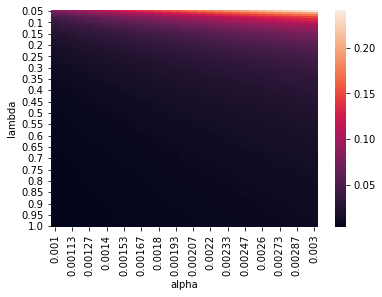

In [5]:
# heatmap
dfh = df.round(5).pivot(index='lambda',columns='alpha', values ='epsilon')
# plt.figure(figsize=(15,15))
sns.heatmap(dfh)

# pairwise plots

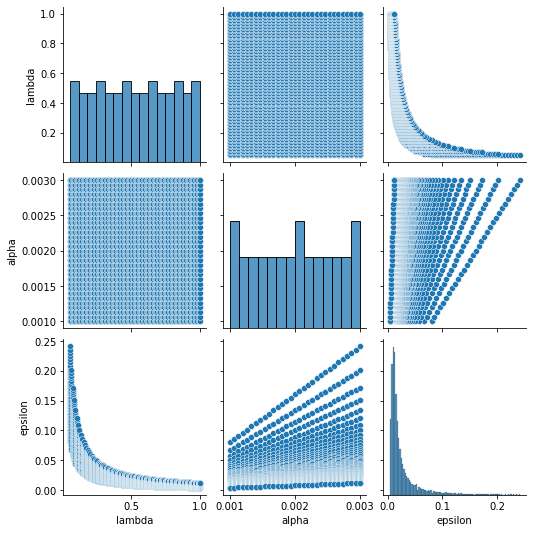

In [6]:
sns.pairplot(df)

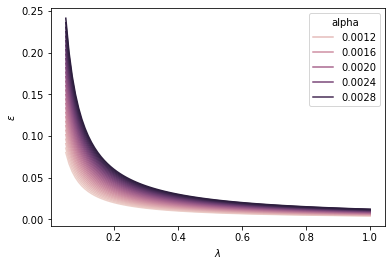

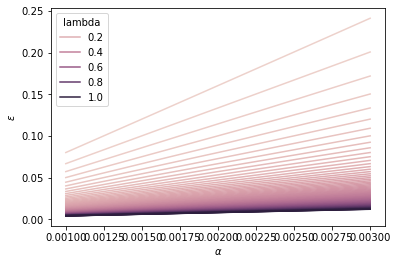

In [7]:
for x,y,hue in [('lambda','epsilon','alpha'),
                ('alpha','epsilon', 'lambda'),
               ]:
    plt.figure()
    sns.lineplot(data=df,
                 x=x,
                 y=y,
                 hue=hue
                )
    plt.xlabel(f'$\\{x}$')
    plt.ylabel(f'$\\{y}$')
    

# surface plot 

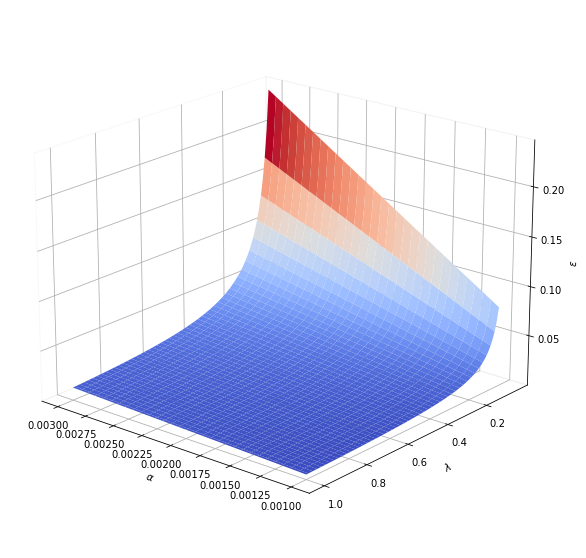

In [8]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

# ax.set_zscale('log')
# Plot the surface.
surf = ax.plot_surface(A, L, EPS, 
                       cmap=cm.coolwarm,
                       linewidth=0, 
                       antialiased=True)
ax.view_init(20,130)
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\lambda$')
ax.set_zlabel('$\\epsilon$')
for i in [ax.xaxis, ax.yaxis, ax.zaxis]:
    i.pane.fill = False

## Q2: bound on $\alpha$-multical given $\epsilon$-DC

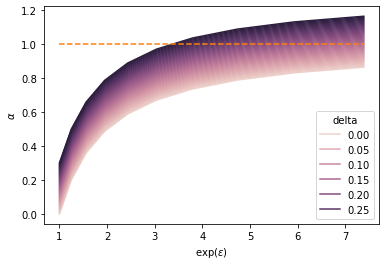

In [10]:
eps = np.linspace(0.0,2.,10)
delta = np.linspace(0.0,0.3,50)

frames = [
         {
          'epsilon': e,   
          'delta':d,
          'exp(\\epsilon)': np.exp(e),   
          'alpha':1-np.exp(-e) + d   
         }
         for e in eps for d in delta
        ]

df = pd.DataFrame.from_records(frames)

x,y,hue = ('exp(\\epsilon)', 'alpha','delta')
plt.figure()
sns.lineplot(data=df,
             x=x,
             y=y,
             hue=hue
            )
plt.xlabel(f'$\\{x}$')
plt.ylabel(f'$\\{y}$')
    
plt.plot([np.min(df[x]),np.max(df[x])],[1,1],'--')

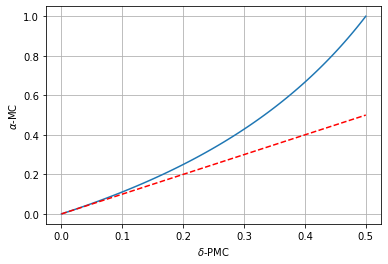

In [13]:
import numpy as np

delta = np.linspace(0,0.5,100)

plt.plot(delta, delta/(1-delta))
# plt.plot([.5,.5],[0,1],'--r')
plt.plot([0,.5],[0,.5], '--r')
plt.xlabel('$\\delta$-PMC')
plt.ylabel('$\\alpha$-MC')
plt.gca().grid(True)